In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data.worldometers.csv',index_col=0)

In [3]:
data.head()

,infected
date,
2020-01-23,845
2020-01-24,1317
2020-01-25,2015
2020-01-26,2800
2020-01-27,4581


In [4]:
data.tail()

,infected
date,
2020-03-31,858361
2020-03-01,935232
2020-03-02,1015096
2020-03-03,1116662
2020-03-04,1201473


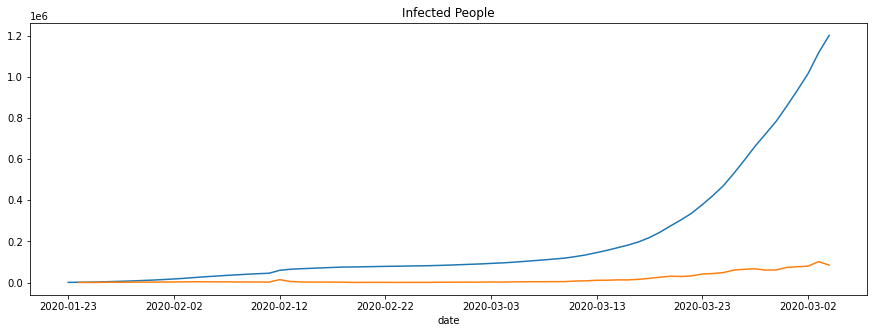

In [5]:
data.infected.plot(figsize=(15, 5), title='Infected People')
(data.infected - data.infected.shift(1)).plot(figsize=(15, 5))

In [6]:
from pyramid.arima import auto_arima

In [7]:
stepwise_model = auto_arima(data,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0); AIC=1402.767, BIC=1407.292, Fit time=0.026 seconds
Fit ARIMA: order=(1, 2, 0); AIC=1402.546, BIC=1409.334, Fit time=0.769 seconds
Fit ARIMA: order=(0, 2, 1); AIC=1402.851, BIC=1409.639, Fit time=0.345 seconds
Fit ARIMA: order=(2, 2, 0); AIC=1404.444, BIC=1413.495, Fit time=1.398 seconds
Fit ARIMA: order=(1, 2, 1); AIC=1404.524, BIC=1413.575, Fit time=1.296 seconds
Fit ARIMA: order=(2, 2, 1); AIC=1399.977, BIC=1411.290, Fit time=2.455 seconds
Fit ARIMA: order=(3, 2, 1); AIC=1403.239, BIC=1416.815, Fit time=2.050 seconds
Fit ARIMA: order=(3, 2, 2); AIC=1400.647, BIC=1416.485, Fit time=5.551 seconds
Total fit time: 14.751 seconds


In [8]:
stepwise_model.aic()

1399.976631936008

In [9]:
stepwise_model.fit(data)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(2, 2, 1),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [10]:
predicted_days = 5
firstPredictionDay = datetime.datetime.strptime(data.index[-1], '%Y-%m-%d') + datetime.timedelta(days = 1)

In [11]:
future_forecast = stepwise_model.predict(n_periods=predicted_days)

In [12]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(future_forecast[x])))

2020-03-05 - 1298350
2020-03-06 - 1394791
2020-03-07 - 1496110
2020-03-08 - 1599942
2020-03-09 - 1707236
